In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re

In [ ]:
url = '/content/drive/MyDrive/datasets/depression_dataset_reddit_cleaned.csv'
df = pd.read_csv(url)

### Data pre-proccesing

In [ ]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i have kind of stuffed around a lot in my life...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
df.shape

(15462, 2)

El dataset tiene 7731 filas y dos columnas, 'clean_text' que contiene el comentario de reddit y 'is_depression' label del comentario que indica si esta relacionado con depresion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15462 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   clean_text     15462 non-null  object  
 1   is_depression  15462 non-null  category
dtypes: category(1), object(1)
memory usage: 256.7+ KB


In [ ]:
df['is_depression'].value_counts()

0    7800
1    7662
Name: is_depression, dtype: int64

El dataset se encuentra equilibrado

In [ ]:
df['is_depression'] = df['is_depression'].astype('category')

Tranformamos nuestro label a tipo categorico

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15462 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   clean_text     15462 non-null  object  
 1   is_depression  15462 non-null  category
dtypes: category(1), object(1)
memory usage: 256.8+ KB


Eliminamos las abrevaciones mas comunes del idioma para perder el minimo significado posible

In [ ]:
print(df['clean_text'][3])

3    i have kind of stuffed around a lot in my life...
3    i have gotten into a lot of things in my life ...
Name: clean_text, dtype: object


code fragment from: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain t": "are not","'s":" is","aren t": "are not",
                     "can t": "cannot","can't've": "cannot have",
                     "cause": "because","could've": "could have","couldn t": "could not",
                     "couldn't've": "could not have", "didn t": "did not","doesn t": "does not",
                     "don t": "do not","hadn t": "had not","hadn t ve": "had not have",
                     "hasn t": "has not","haven t": "have not","he d": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i d": "i would", "i d ve": "i would have","i ll": "i will",
                     "i ll ve": "i will have","i m": "i am","i ve": "i have", "isn t": "is not",
                     "it d": "it would","it d ve": "it would have","it ll": "it will",
                     "it'll've": "it will have", "let s": "let us","ma am": "madam",
                     "mayn t": "may not","might ve": "might have","mightn t": "might not", 
                     "mightn't've": "might not have","must ve": "must have","mustn t": "must not",
                     "mustn't've": "must not have", "needn t": "need not",
                     "needn't've": "need not have","o clock": "of the clock","oughtn t": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she d": "she would","she d ve": "she would have",
                     "she ll": "she will", "she ll ve": "she will have","should ve": "should have",
                     "shouldn t": "should not", "shouldn t ve": "should not have","so ve": "so have",
                     "that d": "that would","that d ve": "that would have", "there d": "there would",
                     "there d ve": "there would have", "they d": "they would",
                     "they d ve": "they would have","they ll": "they will",
                     "they ll ve": "they will have", "they re": "they are","they've": "they have",
                     "to ve": "to have","wasn t": "was not","we d": "we would",
                     "we'd've": "we would have","we ll": "we will","we'll've": "we will have",
                     "we re": "we are","we ve": "we have", "weren t": "were not","what ll": "what will",
                     "what ll ve": "what will have","what re": "what are", "what ve": "what have",
                     "when ve": "when have","where d": "where did", "where ve": "where have",
                     "who ll": "who will","who ll ve": "who will have","who ve": "who have",
                     "why ve": "why have","will ve": "will have","won t": "will not",
                     "won t ve": "will not have", "would ve": "would have","wouldn t": "would not",
                     "wouldn t ve": "would not have","y all": "you all", "y all d": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you d": "you would","you'd've": "you would have",
                     "you ll": "you will","you'll've": "you will have", "you re": "you are",
                     "you ve": "you have","ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would","i'd": "i would", "i'd've": "i would have","I'll": "I will","i'll": "i will",
                     "i'll've": "I will have","I'm": "I am","i'm": "i am","I've": "I have","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it's": "it is","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['clean_text']=df['clean_text'].apply(lambda x:expand_contractions(x))

In [ ]:
print(df['clean_text'][3])

https://pypi.org/project/googletrans/

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
def translateBack(text):
  spanish_text = translator.translate(text, dest='es', src='en').text
  transtated_back = translator.translate(spanish_text, dest='en',src='es').text
  return transtated_back

In [ ]:
lyr = "Look, I was gonna go easy on you not to hurt your feelings But I'm only going to get this one chance"
print(translateBack(lyr))

In [ ]:
df['augmentated_text']=df['clean_text'].apply(lambda x:translateBack(x))

In [ ]:
df.head()

In [ ]:
df['augmentated_text'] = df['augmentated_text'].apply(lambda x: x.lower())

In [ ]:
df['augmentated_text']=df['augmentated_text'].apply(lambda x:expand_contractions(x))

In [ ]:
df.head()

In [ ]:
df.to_pickle('/content/drive/MyDrive/8vo semestre/IA 2/Reddit Project/datasetAugmentated')

In [ ]:
load_df = pd.read_pickle('/content/drive/MyDrive/8vo semestre/IA 2/Reddit Project/datasetAugmentated')

In [ ]:
load_df.head()

In [ ]:
import string

In [ ]:
text = 'I had.such high hopes! for this,dress size or (my usual size) to work for me.'
PUNCT_TO_REMOVE = string.punctuation
ans = text.translate(str.maketrans(' ',' ', PUNCT_TO_REMOVE))
ans

In [ ]:
load_df['augmentated_text'][4]

In [ ]:
load_df['augmentated_text'] = load_df['augmentated_text'].apply(lambda x: x.translate(str.maketrans(',', PUNCT_TO_REMOVE)))

In [ ]:
load_df['augmentated_text'][345]

In [ ]:
load_df['augmentated_text'] = load_df['augmentated_text'].apply(lambda x: x.lower())

In [ ]:
load_df['augmentated_text']=load_df['augmentated_text'].apply(lambda x:expand_contractions(x))

In [ ]:
load_df.to_pickle('/content/drive/MyDrive/8vo semestre/IA 2/Reddit Project/cleandAugmentatedDataset')

In [ ]:
new_df = pd.read_pickle('/content/drive/MyDrive/8vo semestre/IA 2/Reddit Project/cleandAugmentatedDataset')

In [ ]:
part1 = new_df.iloc[:,0:2]
augcolumn = new_df.iloc[:,2:]
labelcolumn = new_df.iloc[:,1:2]
part2 = pd.concat([augcolumn,labelcolumn],axis=1)

In [ ]:
part1.head()

In [ ]:
part2.head()

In [ ]:
columns = ["clean_text","is_depression"]
part1.columns = columns
part2.columns = columns

In [ ]:
df = pd.concat([part1,part2])

In [ ]:
df.info()

In [ ]:
df.to_pickle('/content/drive/MyDrive/8vo semestre/IA 2/Reddit Project/finalDataset')

### Load dataset


In [ ]:
import pandas as pd

In [ ]:
dir = '/content/drive/MyDrive/8vo semestre/IA 2/Reddit Project/finalDataset'
dir2 = "/content/drive/MyDrive/Colab Notebooks/IA2/IAProject/finalDataset"

In [ ]:
df = pd.read_pickle(dir2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15462 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   clean_text     15462 non-null  object  
 1   is_depression  15462 non-null  category
dtypes: category(1), object(1)
memory usage: 256.7+ KB


#particion del dataset en entrenamiento y testing

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X = df.loc[:,['clean_text']]
y = df.loc[:,['is_depression']]

In [ ]:
test_size = 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42,shuffle=True)

# Clasificación del texto haciendo uso de BERT


la documentación para realizar este proceso fué obtenida de https://www.tensorflow.org/text/tutorials/classify_text_with_bert

In [ ]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 11.0 MB/s 
     |████████████████████████████████| 588.3 MB 6.7 kB/s 
     |████████████████████████████████| 1.7 MB 56.7 MB/s 
     |████████████████████████████████| 6.0 MB 56.4 MB/s 
     |████████████████████████████████| 439 kB 67.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
print("tensorflow_text",text.__version__)
print("tensorflow",tf.__version__)
print("tensorflow_hub",hub.__version__)

tensorflow_text 2.10.0
tensorflow 2.10.0
tensorflow_hub 0.12.0


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
#bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
#bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/4")

In [ ]:
initializer = tf.keras.initializers.GlorotUniform()
initializer2 = tf.keras.initializers.HeNormal()

In [ ]:
#creacion del modelo

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['sequence_output'])
l = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(60))(l)
l = tf.keras.layers.Dense(5, activation = 'tanh')(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [ ]:
import time

In [ ]:
model_path = 'depression_Classifier.h5'

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

#opt = tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.4, clipvalue=1.0)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=METRICS)

#creacion de callbacks
callback_earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path, # ruta de guardado para el checkpoint
    save_best_only=True
)

In [ ]:
start = time.time() 
model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks = [model_checkpoint,callback_earlyStopping])
end = time.time()
print(end-start)

Epoch 1/100
310/310 [==============================] - 153s 441ms/step - loss: 0.1771 - accuracy: 0.9395 - precision: 0.9543 - recall: 0.9217 - val_loss: 0.1051 - val_accuracy: 0.9669 - val_precision: 0.9856 - val_recall: 0.9471
Epoch 2/100
310/310 [==============================] - 136s 440ms/step - loss: 0.0864 - accuracy: 0.9735 - precision: 0.9831 - recall: 0.9630 - val_loss: 0.0979 - val_accuracy: 0.9693 - val_precision: 0.9948 - val_recall: 0.9430
Epoch 3/100
310/310 [==============================] - 137s 443ms/step - loss: 0.0615 - accuracy: 0.9821 - precision: 0.9884 - recall: 0.9753 - val_loss: 0.0752 - val_accuracy: 0.9757 - val_precision: 0.9867 - val_recall: 0.9642
Epoch 4/100
310/310 [==============================] - 136s 440ms/step - loss: 0.0472 - accuracy: 0.9858 - precision: 0.9887 - recall: 0.9824 - val_loss: 0.0891 - val_accuracy: 0.9725 - val_precision: 0.9778 - val_recall: 0.9666
Epoch 5/100
310/310 [==============================] - 136s 438ms/step - loss: 0.037

# análisis del modelo

In [ ]:
modelPath = '/content/drive/MyDrive/8vo semestre/IA 2/model/depression_Classifier.h5'

In [ ]:
model = tf.keras.models.load_model(
       (modelPath),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [ ]:
model = tf.keras.models.load_model(
       ("/content/drive/MyDrive/Colab Notebooks/IA2/IAProject/depression_Classifier.h5"),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.evaluate(X_test, y_test)

97/97 [==============================] - 41s 349ms/step - loss: 0.0611 - accuracy: 0.9800 - precision: 0.9875 - recall: 0.9721


[0.06110691651701927,
 0.979954719543457,
 0.9874835014343262,
 0.9721141457557678]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

97/97 [==============================] - 33s 330ms/step


In [ ]:
y_predicted

array([0.9948362 , 0.99483275, 0.5150637 , ..., 0.00605518, 0.01011498,
       0.9948279 ], dtype=float32)

In [ ]:
y_predictedFinal = np.where(y_predicted > 0.2, 1, 0)
y_predictedFinal

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predictedFinal)
cm 

array([[1513,   38],
       [  28, 1514]])

Text(33.0, 0.5, 'Truth')

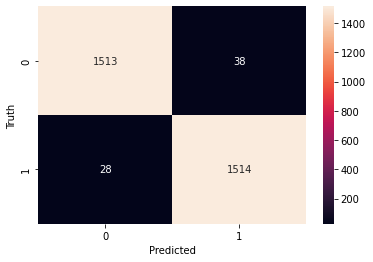

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predictedFinal))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1551
           1       0.98      0.98      0.98      1542

    accuracy                           0.98      3093
   macro avg       0.98      0.98      0.98      3093
weighted avg       0.98      0.98      0.98      3093



### Kappa Score

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_predictedFinal)

0.9573234290272933

### Matthews correlation coefficient (MCC)

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_predictedFinal)

0.957343443007866

### ROC Curve

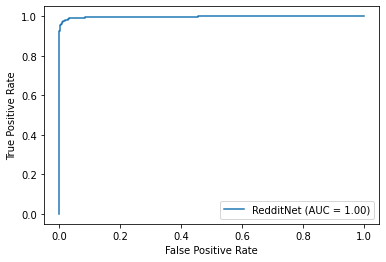

In [ ]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc
import matplotlib as plt

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='RedditNet')
display.plot()

In [ ]:
model.predict(["smiling through it all can not believe this is my life"])

1/1 [==============================] - 1s 940ms/step


array([[0.02299991]], dtype=float32)

In [ ]:
model.predict(["i m sitting on my bed alone in my dark room smoking weed looking at the night sky and old photo listening to music i wa listening year ago and thinking about those time when everything wa fine and i knew le than i know right know it hurt so much physically and mentally"])

1/1 [==============================] - 0s 64ms/step


array([[0.99327916]], dtype=float32)

In [ ]:
model.predict(["i do not like where my life is going I feel hopeless"])

1/1 [==============================] - 5s 5s/step


array([[0.98000884]], dtype=float32)

In [ ]:
model.predict(["I do not want to be here anymore the only reason I stop myself from committing suicide is my parents It is not fair It was not my choice to come into this shit world now it is not my choice to leave"])

1/1 [==============================] - 0s 61ms/step


array([[0.9933697]], dtype=float32)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    